<a href="https://colab.research.google.com/github/bidlopov/ML_DimReduction/blob/main/PCA_tSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from google.colab import drive

# Подключение к Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Загрузка данных
file_path = '/content/drive/My Drive/Collab Datasets/mushrooms.csv'
df = pd.read_csv(file_path)

# Предобработка данных
# Преобразование категориальных признаков в числовые
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [ ]:
# Нормализация данных
features = df.drop('class', axis=1)  # 'class' - это целевая переменная (съедобные или несъедобные)
target = df['class']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]

In [ ]:
# t-SNE
tsne = TSNE(n_components=2, perplexity=50, n_iter=300)
tsne_result = tsne.fit_transform(scaled_features)
df['tsne-one'] = tsne_result[:,0]
df['tsne-two'] = tsne_result[:,1]

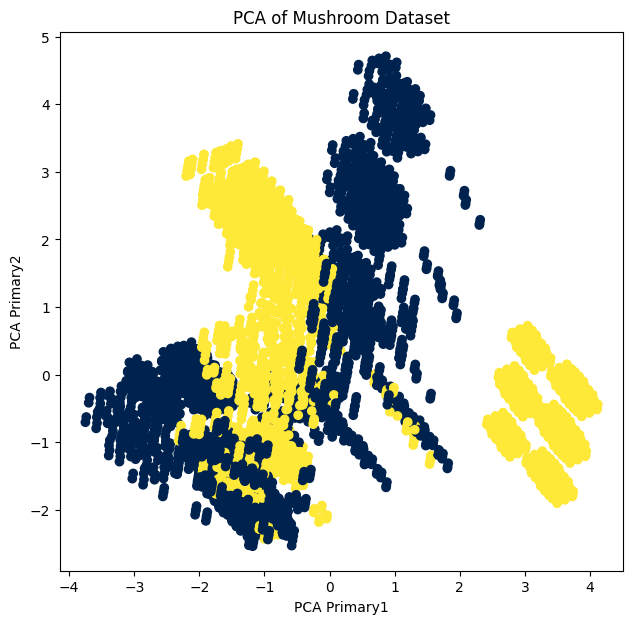

In [ ]:
# Визуализация PCA
plt.figure(figsize=(16,7))
plt.subplot(1, 2, 1)
plt.scatter(df['pca-one'], df['pca-two'], c=target, cmap='cividis')
plt.xlabel('PCA Primary1')
plt.ylabel('PCA Primary2')
plt.title('PCA of Mushroom Dataset')
plt.show()

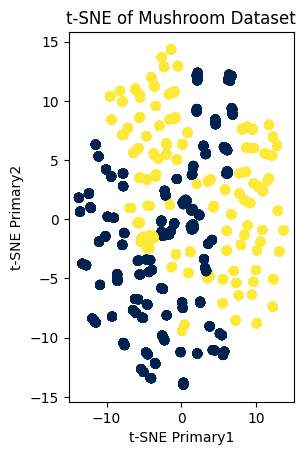

In [ ]:
# Визуализация t-SNE
plt.subplot(1, 2, 2)
plt.scatter(df['tsne-one'], df['tsne-two'], c=target, cmap='cividis')
plt.xlabel('t-SNE Primary1')
plt.ylabel('t-SNE Primary2')
plt.title('t-SNE of Mushroom Dataset')
plt.show()